In [1]:
## 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
## 데이터 로드
df = pd.read_csv('https://raw.githubusercontent.com/TrulySangwonDays/Ecommerce_Churn_Analysis/refs/heads/main/ECommerce.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
# 데이터 크기
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# 가설검정을 통해 선택된 피쳐들을 제외하고 드랍
df = df.drop(columns=['CustomerID', 'PreferredPaymentMode', 'Gender',
                            'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
                            'OrderCount'])

df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,3.0,3,Laptop & Accessory,2,Single,1,5.0,160
1,1,NaN,Phone,1,8.0,3.0,4,Mobile,3,Single,1,0.0,121
2,1,NaN,Phone,1,30.0,2.0,4,Mobile,3,Single,1,3.0,120
3,1,0.0,Phone,3,15.0,2.0,4,Laptop & Accessory,5,Single,0,3.0,134
4,1,0.0,Phone,1,12.0,NaN,3,Mobile,5,Single,0,3.0,130


# 왜도 처리 - 로그변환

In [6]:
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                     'DaySinceLastOrder', 'CashbackAmount']

df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.0,3.0,7.0,46.0
CashbackAmount,5630.0,177.221492,49.193869,0.0,146.0,163.0,196.0,325.0


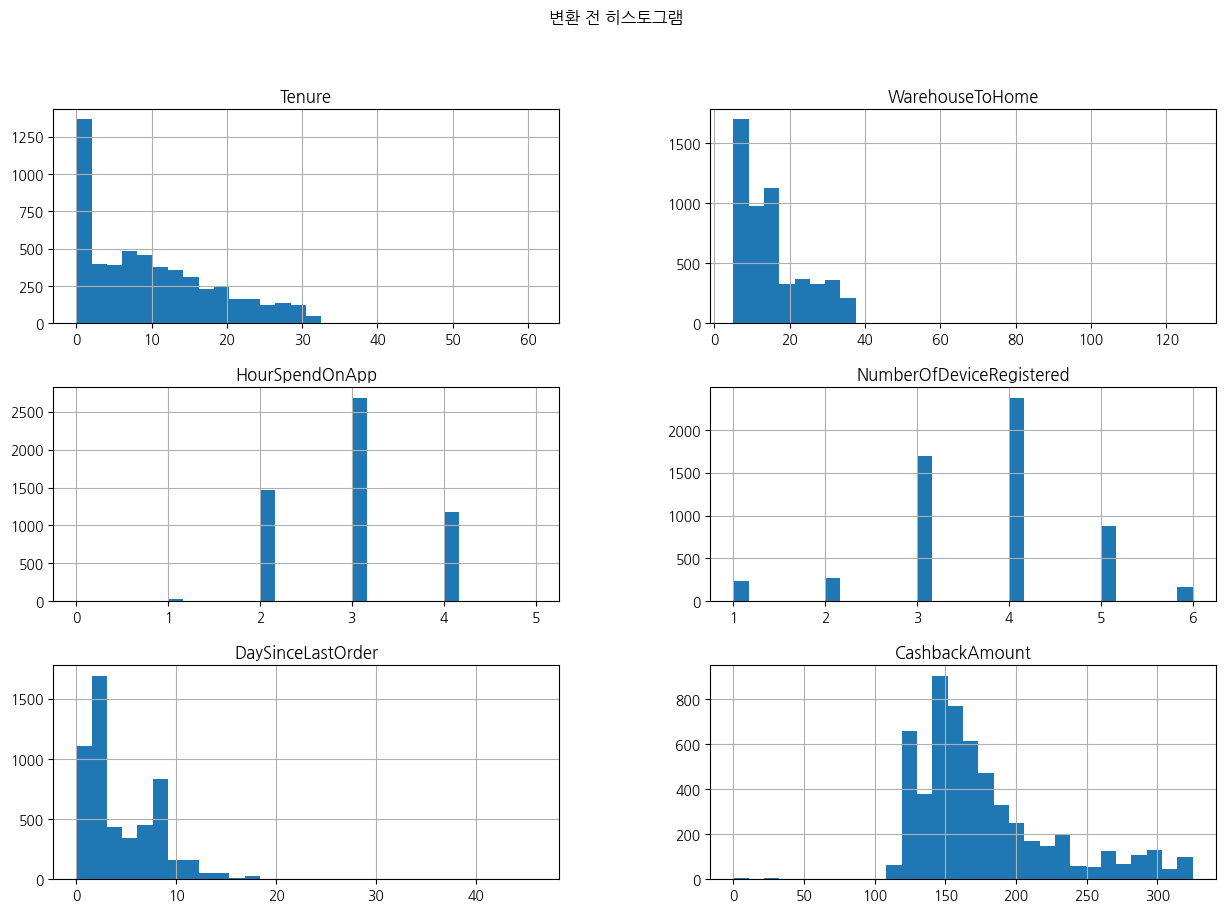

In [7]:
# 수치형 변수들만 히스토그램 시각화
# 변환이 필요한 변수들을 확인하기 위함
df[numerical_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle('변환 전 히스토그램')
plt.show()

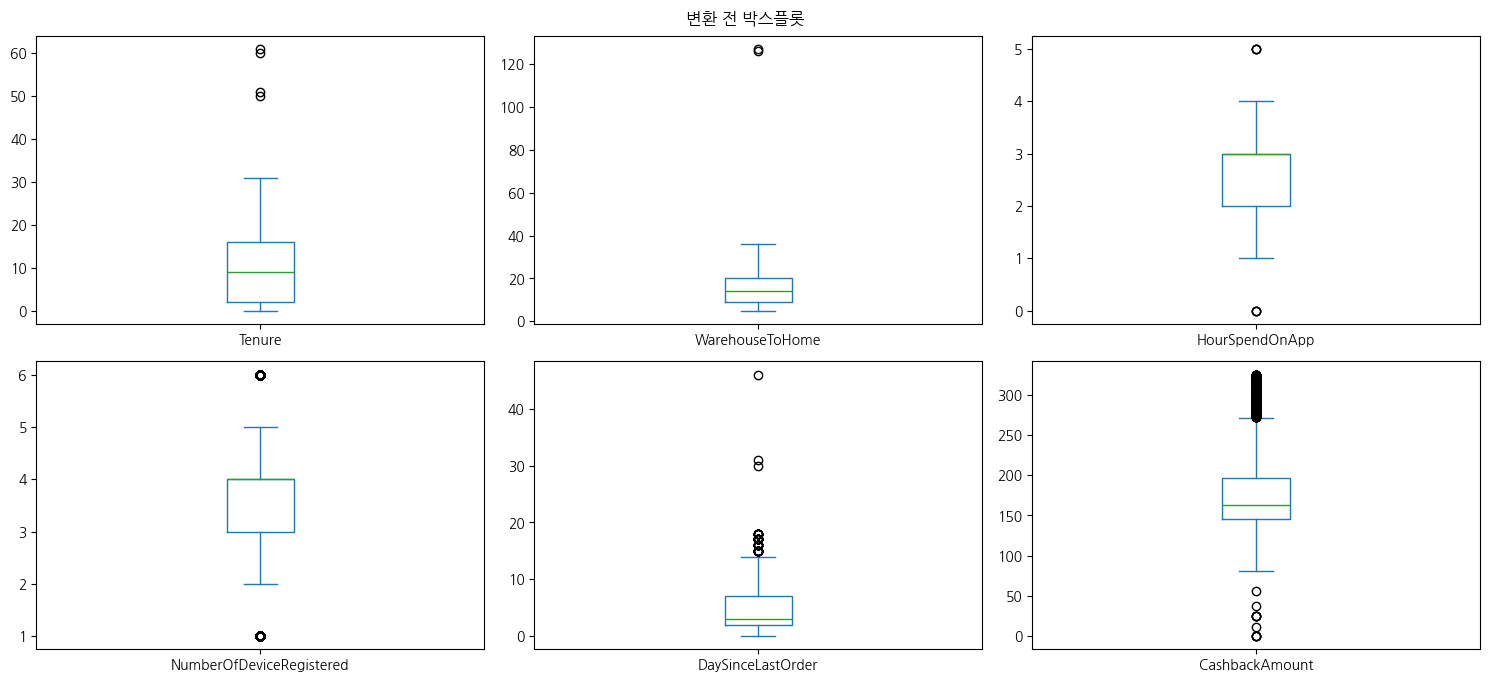

In [8]:
# 박스플롯 시각화
df[numerical_columns].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10),
                             title='변환 전 박스플롯')
plt.tight_layout()
plt.show()

In [9]:
# 모든 수치형변수가 0 이상이므로 로그변환 가능
data_log_numeric = df[numerical_columns].apply(lambda x: np.log1p(x))

data_log_numeric.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,DaySinceLastOrder,CashbackAmount
0,1.609438,1.945910,1.386294,1.386294,1.791759,5.081404
1,NaN,2.197225,1.386294,1.609438,0.000000,4.804021
2,NaN,3.433987,1.098612,1.609438,1.386294,4.795791
3,0.000000,2.772589,1.098612,1.609438,1.386294,4.905275
4,0.000000,2.564949,NaN,1.386294,1.386294,4.875197


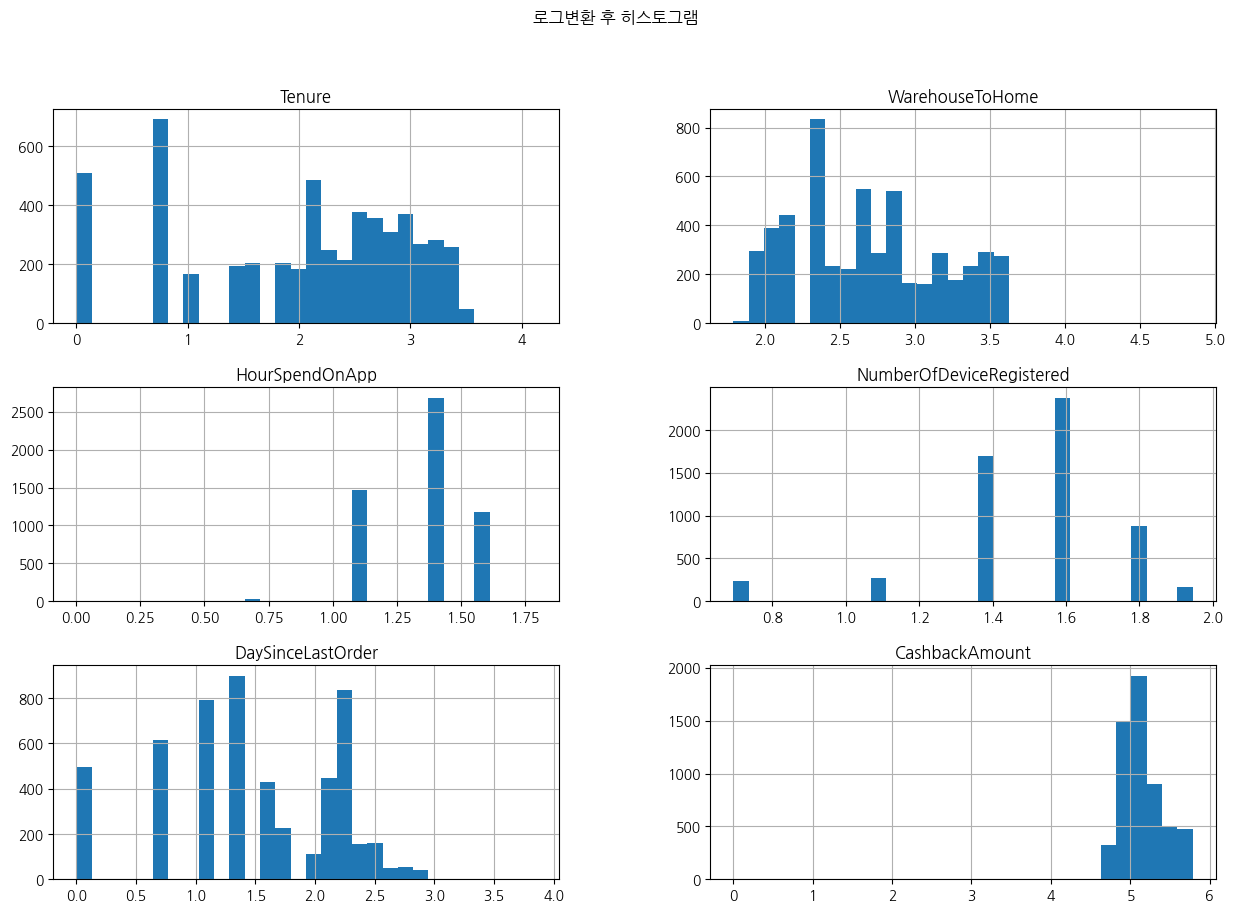

In [10]:
# 히스토그램 시각화
data_log_numeric[numerical_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle('로그변환 후 히스토그램')
plt.show()

In [11]:
# 범주형 변수 원-핫 인코딩
data_encoding = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True)
data_encoding.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,1,5.0,160,True,False,False,True,False,False,False,False,True
1,1,NaN,1,8.0,3.0,4,3,1,0.0,121,False,True,False,False,True,False,False,False,True
2,1,NaN,1,30.0,2.0,4,3,1,3.0,120,False,True,False,False,True,False,False,False,True
3,1,0.0,3,15.0,2.0,4,5,0,3.0,134,False,True,False,True,False,False,False,False,True
4,1,0.0,1,12.0,NaN,3,5,0,3.0,130,False,True,False,False,True,False,False,False,True


In [12]:
# 로그변환 데이터를 기존 데이터셋에 적용
data_encoding = data_encoding.drop(numerical_columns, axis=1)
data2 = pd.concat([data_encoding, data_log_numeric], axis=1)

data2.head()

,Churn,CityTier,SatisfactionScore,Complain,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,DaySinceLastOrder,CashbackAmount
0,1,3,2,1,True,False,False,True,False,False,False,False,True,1.609438,1.945910,1.386294,1.386294,1.791759,5.081404
1,1,1,3,1,False,True,False,False,True,False,False,False,True,NaN,2.197225,1.386294,1.609438,0.000000,4.804021
2,1,1,3,1,False,True,False,False,True,False,False,False,True,NaN,3.433987,1.098612,1.609438,1.386294,4.795791
3,1,3,5,0,False,True,False,True,False,False,False,False,True,0.000000,2.772589,1.098612,1.609438,1.386294,4.905275
4,1,1,5,0,False,True,False,False,True,False,False,False,True,0.000000,2.564949,NaN,1.386294,1.386294,4.875197


# 결측치 처리 - KNN Imputer

In [13]:
df.isnull().sum()

Churn                         0
Tenure                      264
PreferredLoginDevice          0
CityTier                      0
WarehouseToHome             251
HourSpendOnApp              255
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
Complain                      0
DaySinceLastOrder           307
CashbackAmount                0
dtype: int64

In [14]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 결측치가 있는 칼럼들
columns_with_nan = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'DaySinceLastOrder']

# 최적 이웃 수 계산을 위한 함수
def find_best_k(X_train, X_test, y_train, y_test):
    best_k = 1
    best_rmse = float('inf')

    for k in range(1, 11):  # k를 1부터 10까지 테스트
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse = mean_squared_error(y_test, predictions, squared=False)

        if rmse < best_rmse:
            best_rmse = rmse
            best_k = k

    return best_k, best_rmse, predictions

# 결측치가 없는 데이터로 훈련 및 테스트 세트 분할
complete_data = data2.dropna(subset=columns_with_nan)

# X와 y 데이터 설정
X = complete_data
y = complete_data[columns_with_nan]

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 최적의 k 찾기
best_k, best_rmse, predictions = find_best_k(X_train_scaled, X_test_scaled, y_train, y_test)
print(f'최적의 이웃 수: {best_k}')
print(f'RMSE: {best_rmse}')

# KNN Imputer를 사용하여 결측치 채우기
imputer = KNNImputer(n_neighbors=best_k)
data2[columns_with_nan] = imputer.fit_transform(data2[columns_with_nan])

# 결과 확인
print(data2[columns_with_nan].head(15))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

최적의 이웃 수: 1
RMSE: 0.21967095377269094
      Tenure  WarehouseToHome  HourSpendOnApp  DaySinceLastOrder
0   1.609438         1.945910        1.386294           1.791759
1   0.000000         2.197225        1.386294           0.000000
2   2.302585         3.433987        1.098612           1.386294
3   0.000000         2.772589        1.098612           1.386294
4   0.000000         2.564949        1.386294           1.386294
5   0.000000         3.135494        1.386294           2.079442
6   0.000000         2.484907        1.098612           0.000000
7   2.484907         1.945910        1.386294           0.000000
8   2.639057         2.302585        0.693147           1.098612
9   1.945910         3.465736        1.098612           0.693147
10  1.609438         2.944439        1.098612           2.197225
11  2.484907         1.945910        1.386294           0.000000
12  0.000000         2.484907        1.098612           1.098612
13  0.000000         2.772589        1.386294       

In [15]:
# 결측치가 채워진 데이터
data2.head()

,Churn,CityTier,SatisfactionScore,Complain,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,DaySinceLastOrder,CashbackAmount
0,1,3,2,1,True,False,False,True,False,False,False,False,True,1.609438,1.945910,1.386294,1.386294,1.791759,5.081404
1,1,1,3,1,False,True,False,False,True,False,False,False,True,0.000000,2.197225,1.386294,1.609438,0.000000,4.804021
2,1,1,3,1,False,True,False,False,True,False,False,False,True,2.302585,3.433987,1.098612,1.609438,1.386294,4.795791
3,1,3,5,0,False,True,False,True,False,False,False,False,True,0.000000,2.772589,1.098612,1.609438,1.386294,4.905275
4,1,1,5,0,False,True,False,False,True,False,False,False,True,0.000000,2.564949,1.386294,1.386294,1.386294,4.875197


In [16]:
data2.isnull().sum()

Churn                                  0
CityTier                               0
SatisfactionScore                      0
Complain                               0
PreferredLoginDevice_Mobile Phone      0
PreferredLoginDevice_Phone             0
PreferedOrderCat_Grocery               0
PreferedOrderCat_Laptop & Accessory    0
PreferedOrderCat_Mobile                0
PreferedOrderCat_Mobile Phone          0
PreferedOrderCat_Others                0
MaritalStatus_Married                  0
MaritalStatus_Single                   0
Tenure                                 0
WarehouseToHome                        0
HourSpendOnApp                         0
NumberOfDeviceRegistered               0
DaySinceLastOrder                      0
CashbackAmount                         0
dtype: int64

# 분류모델 - 랜덤포레스트

타겟의 클래스 불균형(8:2)이 존재하기 때문에 smote를 사용하여 오버샘플링 적용 후 모델 학습

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# X와 y 설정
X = data2.drop(columns=['Churn'])
y = data2['Churn']

# 학습, 검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE를 적용하여 클래스 불균형 처리
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터에 대해 예측 후 pred 칼럼 추가
y_pred = model.predict(X_test)
data2.loc[X_test.index, 'pred'] = y_pred

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1405
           1       0.86      0.83      0.84       284

    accuracy                           0.95      1689
   macro avg       0.91      0.90      0.91      1689
weighted avg       0.95      0.95      0.95      1689



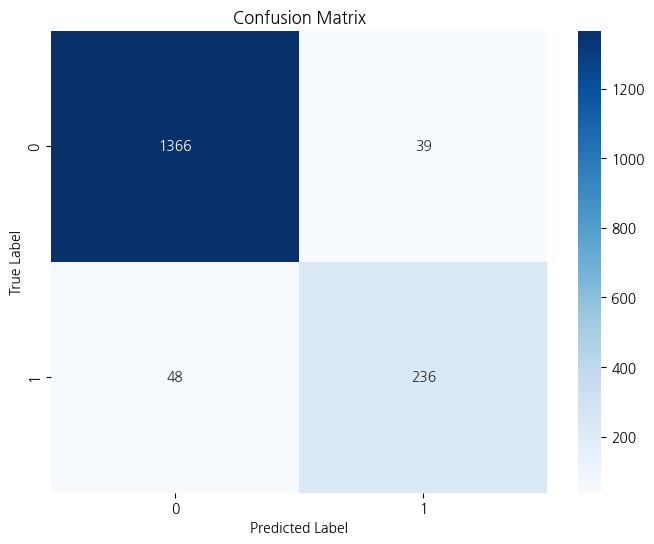

In [18]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

0인데 1로 예측한 애들: 39명

                                Feature  Importance
12                               Tenure    0.276450
17                       CashbackAmount    0.108265
16                    DaySinceLastOrder    0.103868
13                      WarehouseToHome    0.086412
15             NumberOfDeviceRegistered    0.083377
14                       HourSpendOnApp    0.063091
1                     SatisfactionScore    0.057852
2                              Complain    0.051994
11                 MaritalStatus_Single    0.044941
0                              CityTier    0.028945
6   PreferedOrderCat_Laptop & Accessory    0.018721
8         PreferedOrderCat_Mobile Phone    0.017227
3     PreferredLoginDevice_Mobile Phone    0.014039
4            PreferredLoginDevice_Phone    0.013447
7               PreferedOrderCat_Mobile    0.011880
10                MaritalStatus_Married    0.011202
5              PreferedOrderCat_Grocery    0.005243
9               PreferedOrderCat_Others    0.003045


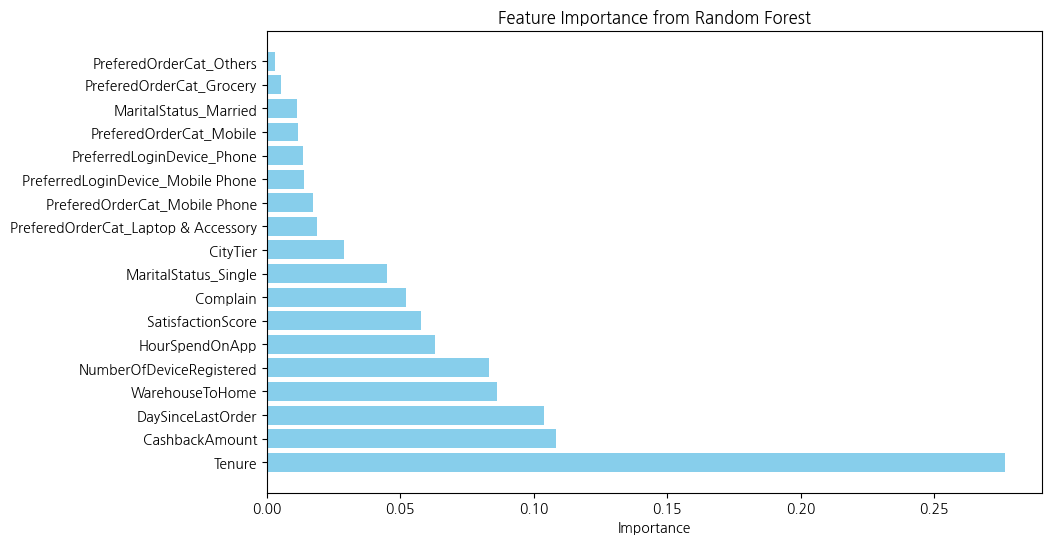

In [19]:
# 피처 중요도 추출
importances = model.feature_importances_

# 피처 이름 가져오기
feature_names = X_train.columns

# 피처 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print(importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# 클러스터링

In [20]:
data2['pred'].value_counts()

pred
0.0    1414
1.0     275
Name: count, dtype: int64

In [21]:
# 이탈하지 않았는데 이탈고객으로 예측한 애들
a = data2[(data2['pred']==1)&(data2['Churn']==0)]

In [22]:
print(len(a))
# 39명 맞음

39


In [23]:
a.columns

Index(['Churn', 'CityTier', 'SatisfactionScore', 'Complain',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'DaySinceLastOrder', 'CashbackAmount',
       'pred'],
      dtype='object')

In [24]:
aa = a.drop(columns=['Churn', 'pred'])

## 이탈 위험군 군집화(0인데 1로 예측)

### KMeans(k=6)

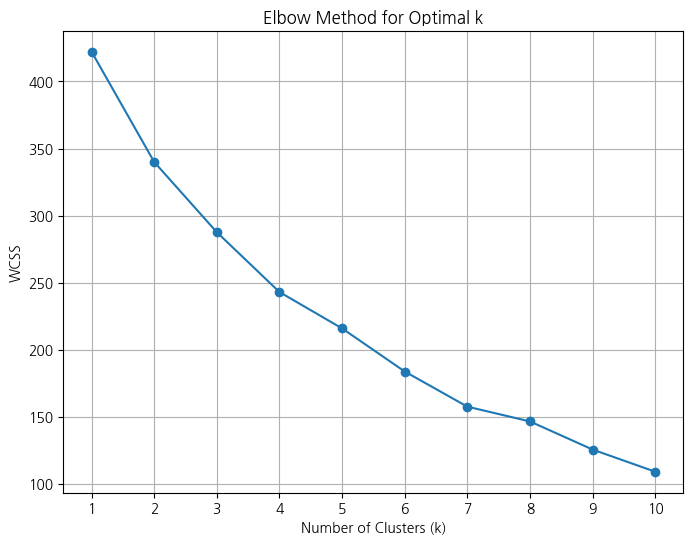

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 엘보우 메소드로 최적의 k값 찾기

# 수치형 변수 스케일링
numeric_cols = ['HourSpendOnApp', 'NumberOfDeviceRegistered', 'CashbackAmount',
                    'Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(aa[numeric_cols])

# 스케일링 결과를 데이터프레임으로 변환
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

# 범주형 변수 선택
categorical_cols = [col for col in aa.columns if col not in numeric_cols]
categorical_df = aa[categorical_cols]

# 스케일링된 수치형 변수와 범주형 변수를 결합
final_df = pd.concat([scaled_numeric_df, categorical_df.reset_index(drop=True)], axis=1)

wcss = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(final_df)
  wcss.append(kmeans.inertia_)  # WCSS 값 추가

# 엘보우 그래프 출력
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [26]:
from sklearn.cluster import KMeans

# 클러스터 수 설정(6개)
n_clusters = 6

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(final_df)

# 클러스터 레이블 추가
final_df['Cluster'] = kmeans.labels_

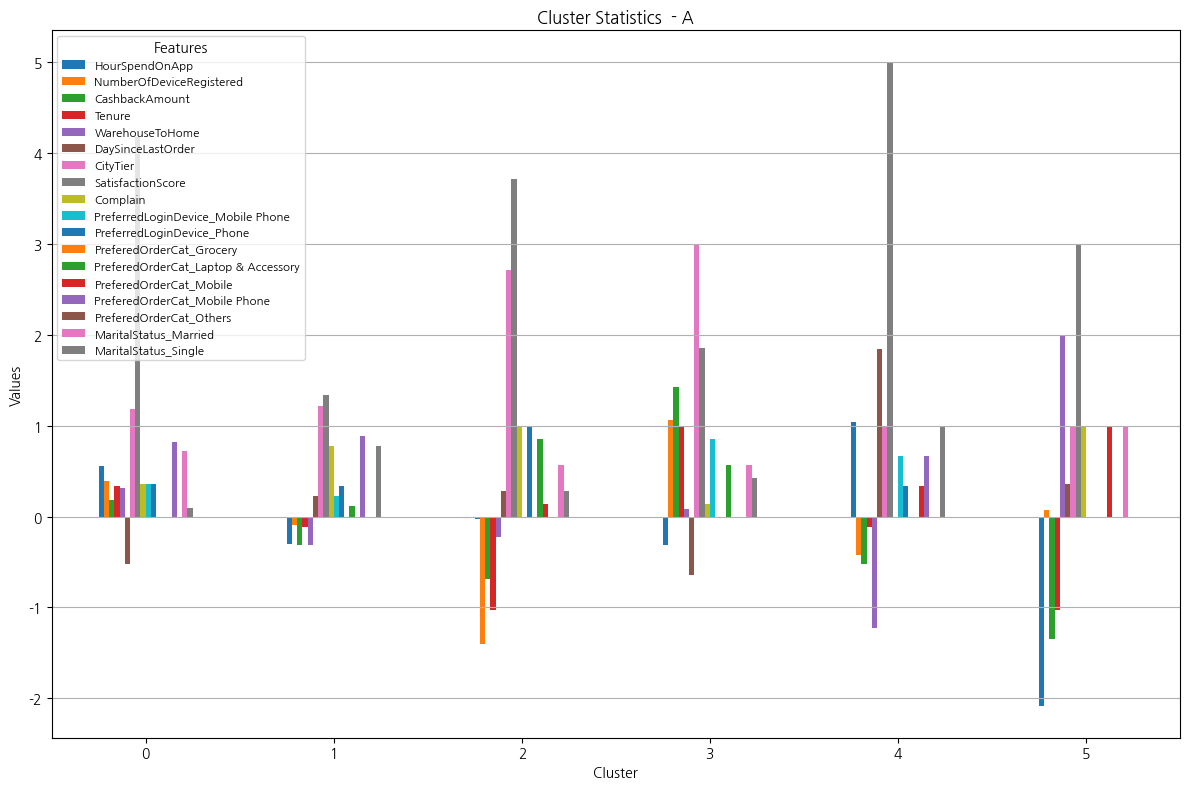

In [27]:
# 클러스터별로 특징을 보기 위한 그룹화
cluster_stats = final_df.groupby('Cluster').mean()

# 클러스터별 막대그래프 그리기
cluster_stats.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Statistics  - A')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='Features', fontsize='small')
plt.grid(axis='y')
plt.tight_layout()
plt.show()